# Covariance

- Joint variability of two random variables.

$\frac{\sum_{i=0}^{N-1}{(x_i - \bar{x})(y_i - \bar{y})}}{N-1}$

- in numpy cov result it returns a matrix 

$\begin{bmatrix}
    var(x) && cov(x,y) \\
    cov(x,y) && var(y) \\
\end{bmatrix}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 

# style.use('ggplot')

%matplotlib inline

## Positive Covariance

In [2]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([5, 6, 7, 8, 9, 10])

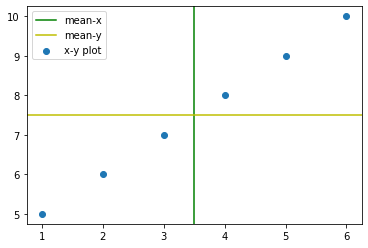

In [3]:
plt.axvline(x.mean(),c='g',label='mean-x')
plt.axhline(y.mean(),c='y',label='mean-y')
plt.scatter(x,y,label='x-y plot')
plt.legend()

In [4]:
np.sum((x- x.mean()) * (y - y.mean())) / (x.shape[0] - 1)

3.5

In [5]:
np.cov(x), np.cov(y), np.cov(x,y)

(array(3.5),
 array(3.5),
 array([[3.5, 3.5],
        [3.5, 3.5]]))

## Zero Covariance

In [6]:
x = np.array([1, 1, 1, 1, 1, 1])
y = np.array([5, 6, 7, 8, 9, 10])

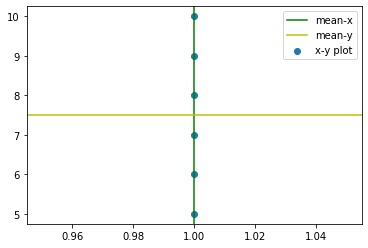

In [7]:
plt.axvline(x.mean(),c='g',label='mean-x')
plt.axhline(y.mean(),c='y',label='mean-y')
plt.scatter(x,y,label='x-y plot')
plt.legend()

In [8]:
np.cov(x), np.cov(y), np.cov(x,y)

(array(0.),
 array(3.5),
 array([[0. , 0. ],
        [0. , 3.5]]))

In [9]:
np.cov(x), np.cov(y), np.cov(y,x)

(array(0.),
 array(3.5),
 array([[3.5, 0. ],
        [0. , 0. ]]))

In [10]:
np.sum((x- x.mean()) * (y - y.mean())) / (x.shape[0] - 1)

0.0

## Negative Covariance

In [11]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([5, 6, 7, 8, 9, 10][::-1])

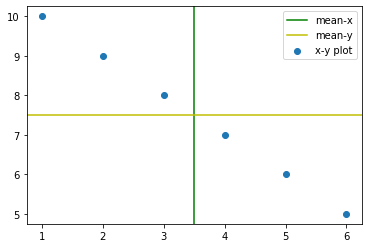

In [12]:
plt.axvline(x.mean(),c='g',label='mean-x')
plt.axhline(y.mean(),c='y',label='mean-y')
plt.scatter(x,y,label='x-y plot')
plt.legend()

In [13]:
np.cov(x), np.cov(y), np.cov(x,y)

(array(3.5),
 array(3.5),
 array([[ 3.5, -3.5],
        [-3.5,  3.5]]))

In [14]:
np.sum((x- x.mean()) * (y - y.mean())) / (x.shape[0] - 1)

-3.5

# Correlation Coefficient

- How strong is the relationship between two variables.
- 1 indicates a strong positive relationship.
- -1 indicates a strong negative relationship.
- A result of zero indicates no relationship at all.
- Not sensitive to the scale of data.

## Pearson Correlation

$\rho_{X,Y}=\frac{cov(X,Y)}{\sigma_X\sigma_Y}$

$\rho$ = population correlation coefficient \
$\sigma$ = standard deviation \
$\sigma^2$ = variance \
$cov(x,y)$ = covariance of x and y = $\sigma_{x,y}$

### Positive Correlation

In [15]:
from scipy.stats import pearsonr

In [16]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([15, 16, 17, 18, 19, 20])

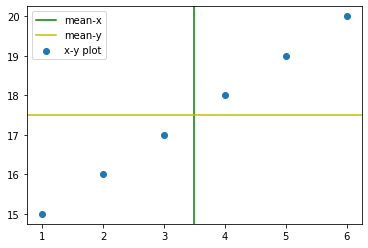

In [17]:
plt.axvline(x.mean(),c='g',label='mean-x')
plt.axhline(y.mean(),c='y',label='mean-y')
plt.scatter(x,y,label='x-y plot')
plt.legend()

In [18]:
cov_mat = np.cov(x,y)

print(cov_mat)

[[3.5 3.5]
 [3.5 3.5]]


In [19]:
cov_mat[1][0] / np.sqrt(cov_mat[0][0] * cov_mat[1][1])

1.0

In [20]:
np.corrcoef(x,y)

array([[1., 1.],
       [1., 1.]])

In [21]:
pearsonr(x,y)

(0.9999999999999999, 1.8488927466117464e-32)

### Negative Correlation

In [22]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([15, 16, 17, 18, 19, 20][::-1])

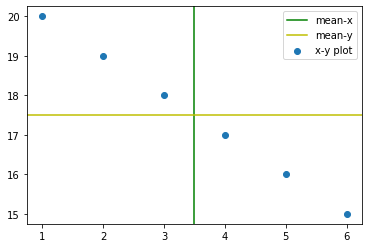

In [23]:
plt.axvline(x.mean(),c='g',label='mean-x')
plt.axhline(y.mean(),c='y',label='mean-y')
plt.scatter(x,y,label='x-y plot')
plt.legend()

In [24]:
cov_mat = np.cov(x,y)

print(cov_mat)

[[ 3.5 -3.5]
 [-3.5  3.5]]


In [25]:
cov_mat[1][0] / np.sqrt(cov_mat[0][0] * cov_mat[1][1])

-1.0

In [26]:
np.corrcoef(x,y)

array([[ 1., -1.],
       [-1.,  1.]])

In [27]:
np.corrcoef(x,y)[0][1]

-1.0

In [28]:
pearsonr(x,y)

(-0.9999999999999999, 1.8488927466117464e-32)

## Spearman's Rank Correlation

$\rho = 1 - \frac{6 \sum {d}^2}{n(n^2 - 1)}$

$r_x$ = ranks of x \
$r_y$ = ranks of y 

d = differences of ranks \
d = $r_x - r_y$ \
n = size of array

### ranks
|x|ranks|
|-|-|
|1|1|
|2|2|
|3|3|
|4|4|

|x|ranks|
|-|-|
|44|4|
|2|1|
|33|3|
|11|2|

In [29]:
x = np.array([6, 4, 3, 5, 2, 1])
y = np.array([15, 16, 17, 18, 19, 20])

In [30]:
def get_rank(x):
    temp = x.argsort()
    rank = np.empty_like(temp)
    rank[temp] = np.arange(len(x))
    return rank + 1

In [31]:
x_rank = get_rank(x)
y_rank = get_rank(y)

print(x,x_rank)
print(y,y_rank)

[6 4 3 5 2 1] [6 4 3 5 2 1]
[15 16 17 18 19 20] [1 2 3 4 5 6]


In [32]:
n = x.shape[0]
1 - ((6 * np.square(x_rank - y_rank).sum()) / (n * (n**2 - 1)))

-0.8285714285714285

In [33]:
from scipy.stats import spearmanr

In [34]:
spearmanr(x,y)

SpearmanrResult(correlation=-0.8285714285714287, pvalue=0.04156268221574334)

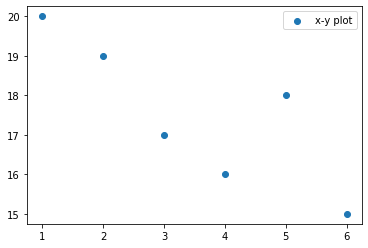

In [35]:
plt.scatter(x,y,label='x-y plot')
plt.legend()

In [36]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([15, 16, 17, 18, 19, 20])

spearmanr(x,y)

SpearmanrResult(correlation=1.0, pvalue=0.0)

## Kendall Rank Correlation ($\tau$)

In [37]:
from scipy.stats import kendalltau

KendalltauResult(correlation=0.9999999999999999, pvalue=0.002777777777777778)


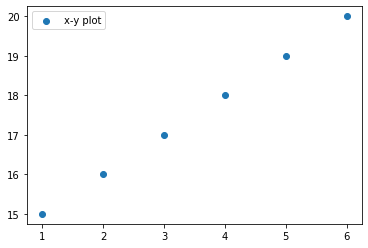

In [38]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([15, 16, 17, 18, 19, 20])

print(kendalltau(x,y))

plt.scatter(x,y,label='x-y plot')
plt.legend()

KendalltauResult(correlation=-0.9999999999999999, pvalue=0.002777777777777778)


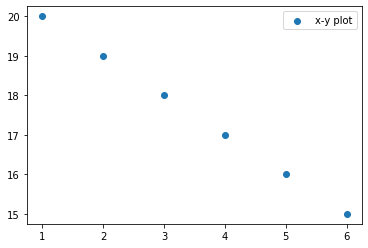

In [39]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([15, 16, 17, 18, 19, 20][::-1])


print(kendalltau(x,y))

plt.scatter(x,y,label='x-y plot')
plt.legend()

## R-Squared score / Coefficient of determination

$R^2 = 1 - \frac{RSS}{TSS}$

RSS = Residual Sum of Squares = $\sum_{i=0}^{N}{(y_i - f(x_i))^2}$ 

TSS = Total Sum of Squares = $\sum_{i=0}^{N}{(y_i - \bar{y})^2}$


- for best file of regression line will have highest r2 score.

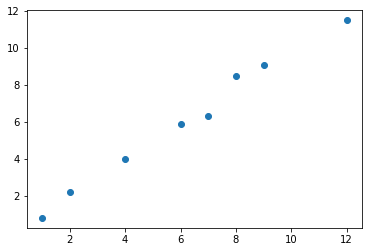

In [40]:
y = np.array([1, 2, 4, 6, 7, 9, 12, 8])
f_x = np.array([0.8, 2.2, 4, 5.9, 6.3, 9.1, 11.5, 8.5])

plt.scatter(y, f_x)

In [41]:
RSS = np.square(y - f_x).sum()
TSS = np.square(y - y.mean()).sum()

print(1 - (RSS / TSS))

0.9885111989459816


In [42]:
from sklearn.metrics import r2_score

r2_score(y, f_x)

0.9885111989459816

-2.654176548089592


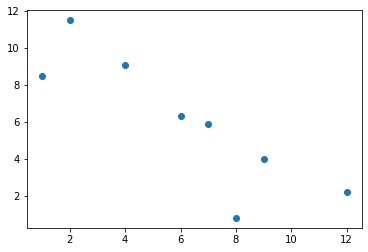

In [43]:
y = np.array([1, 2, 4, 6, 7, 9, 12, 8])
f_x = np.array([0.8, 2.2, 4, 5.9, 6.3, 9.1, 11.5, 8.5][::-1])

print(r2_score(y, f_x))

plt.scatter(y,f_x)

-1.2919423279498563


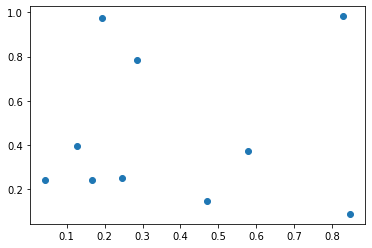

In [44]:

y = np.random.rand(10)
f_x = np.random.rand(10)

print(r2_score(y, f_x))

plt.scatter(y,f_x)